In [55]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage


In [56]:
df = pd.read_csv("C:\Ahmed\Programming\Python\ABDELGHAFOR’S VIRTUAL INTERNSHIPS Machine Learning\Session 4\Data\wine-clustering.csv")
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\A'
<>:1: SyntaxWarning: invalid escape sequence '\A'
C:\Users\ahmed\AppData\Local\Temp\ipykernel_22192\2521229253.py:1: SyntaxWarning: invalid escape sequence '\A'
  df = pd.read_csv("C:\Ahmed\Programming\Python\ABDELGHAFOR’S VIRTUAL INTERNSHIPS Machine Learning\Session 4\Data\wine-clustering.csv")


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [57]:
df.columns =df.columns.str.lower().str.replace(" " , "")

In [58]:
print(df.isnull().sum())

scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

alcohol                 0
malic_acid              0
ash                     0
ash_alcanity            0
magnesium               0
total_phenols           0
flavanoids              0
nonflavanoid_phenols    0
proanthocyanins         0
color_intensity         0
hue                     0
od280                   0
proline                 0
dtype: int64


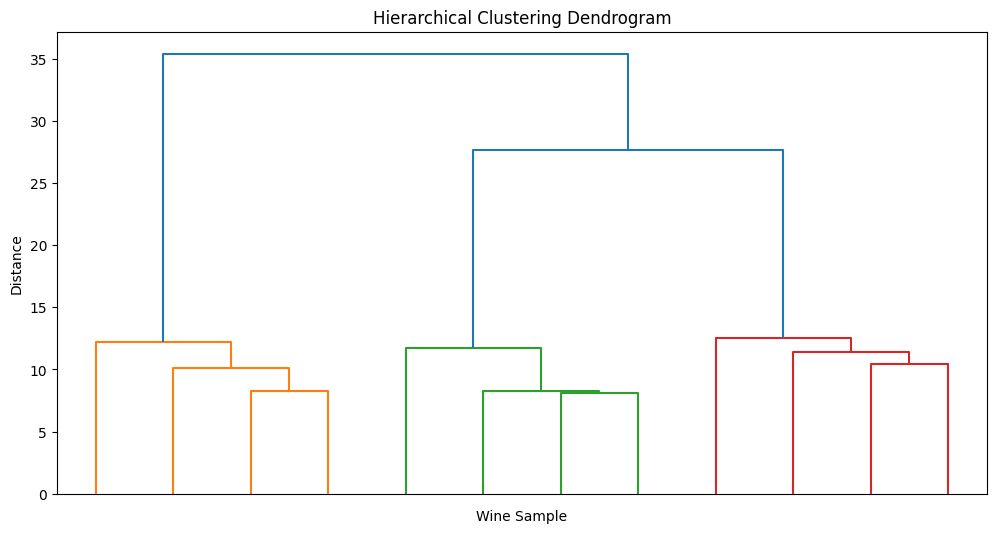

In [59]:
plt.figure(figsize=(12, 6))
Z = linkage(data_scaled, method='ward')
dendrogram(Z, truncate_mode='lastp', p=12, show_leaf_counts=False, leaf_rotation=45, leaf_font_size=6)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Wine Sample')
plt.ylabel('Distance')
plt.show()

In [60]:

n_clusters = 4  
hc = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
clusters = hc.fit_predict(data_scaled)

df['Cluster'] = clusters

In [61]:
cluster_analysis = df.groupby('Cluster').mean()
cluster_analysis

,alcohol,malic_acid,ash,ash_alcanity,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
Cluster,,,,,,,,,,,,,
0,13.061607,3.166607,2.412857,21.003571,99.857143,1.694286,0.847857,0.449464,1.129286,6.850179,0.721000,1.727321,624.946429
1,12.232667,1.764000,2.058667,18.396667,96.100000,2.403667,2.167667,0.275667,1.821333,3.107000,1.058667,2.937333,539.300000
2,13.669219,1.970000,2.463125,17.528125,106.156250,2.850000,3.009688,0.291094,1.908125,5.450000,1.071406,3.158437,1076.046875
3,12.173214,2.126429,2.382857,22.150000,88.750000,2.112143,2.002857,0.440714,1.542143,2.668571,1.061429,2.781786,460.857143


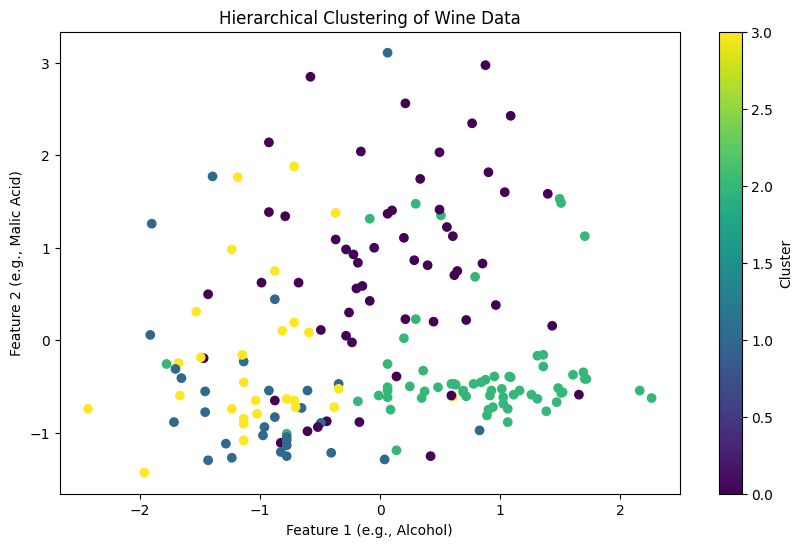

In [62]:

plt.figure(figsize=(10, 6))
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=clusters, cmap='viridis', marker='o')
plt.title('Hierarchical Clustering of Wine Data')
plt.xlabel('Feature 1 (e.g., Alcohol)')
plt.ylabel('Feature 2 (e.g., Malic Acid)')
plt.colorbar(label='Cluster')
plt.show()